# Project Milestone 2 : Cleaning/Formatting Flat File Source
## DSC540
### Astrid Fuentes

Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:

1. Replace Headers
2. Format data into a more readable format
3. Identify outliers and bad data
4. Find duplicates
5. Fix casing or inconsistent values
6. Conduct Fuzzy Matching

In [11]:
# Define the libraries
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
path="/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project"
os.chdir(path)


In [13]:
os.getcwd()

'/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project'

In [14]:
# Read the visit_data csv file using pandas' read_csv function
df = pd.read_csv("covid19.csv")

In [15]:
df.head()

,Data as of,Start Date,End Date,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,All Ages,347131.0,3329907.0,331354.0,161474.0,8726.0,524629.0,NaN
1,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,Under 1 year,39.0,18436.0,193.0,6.0,21.0,247.0,NaN
2,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,0-17 years,165.0,32453.0,536.0,29.0,175.0,847.0,NaN
3,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,1-4 years,21.0,3388.0,120.0,3.0,59.0,197.0,NaN
4,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,5-14 years,58.0,5440.0,153.0,11.0,74.0,274.0,NaN


## Rename columns

In [16]:
# Rename columns
df= df.rename(columns = {'Data as of': 'date_pulled','Start Date': 'start_date', 'End Date': 'end_date', 
                         'State': 'state', 'Sex': 'gender', 'Age group':'age_group',
                         'COVID-19 Deaths': 'covid19_deaths',
                         'Total Deaths': 'total_deaths', 'Pneumonia Deaths': 'pneumonia_deaths', 
                         'Pneumonia and COVID-19 Deaths': 'pneumonia_and_covid19_deaths', 
                         'Influenza Deaths': 'influenza_deaths', 
                         'Pneumonia, Influenza, or COVID-19 Deaths': 'pneumonia_influenza_covid19_deaths',
                         'Footnote': 'footnote'}, inplace = False)

In [17]:
# See changes in column names
df.head()

,date_pulled,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid19_deaths,influenza_deaths,pneumonia_influenza_covid19_deaths,footnote
0,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,All Ages,347131.0,3329907.0,331354.0,161474.0,8726.0,524629.0,NaN
1,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,Under 1 year,39.0,18436.0,193.0,6.0,21.0,247.0,NaN
2,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,0-17 years,165.0,32453.0,536.0,29.0,175.0,847.0,NaN
3,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,1-4 years,21.0,3388.0,120.0,3.0,59.0,197.0,NaN
4,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,5-14 years,58.0,5440.0,153.0,11.0,74.0,274.0,NaN


In [18]:
# Get column names to be used later
col=df.columns.tolist()
print(col)

['date_pulled', 'start_date', 'end_date', 'state', 'gender', 'age_group', 'covid19_deaths', 'total_deaths', 'pneumonia_deaths', 'pneumonia_and_covid19_deaths', 'influenza_deaths', 'pneumonia_influenza_covid19_deaths', 'footnote']


## Check for Nulls

In [19]:
## Rename columns# Check to see if there are nulls in any record in the data frame
check_nan_in_df = df.isnull().values.any()
print (check_nan_in_df)

True


In [20]:
# Check for null values using isnull()
print("The column date_pulled contains NaN - %s " % df.date_pulled.isnull().values.any())
print("The column start_date contains NaN - %s " % df.start_date.isnull().values.any())
print("The column end_date contains NaN - %s " % df.end_date.isnull().values.any())
print("The column state contains NaN - %s " % df.state.isnull().values.any())
print("The column gender contains NaN - %s " % df.gender.isnull().values.any())
print("The column age_group contains NaN - %s " % df.age_group.isnull().values.any())
print("The column covid19_deaths contains NaN - %s " % df.covid19_deaths.isnull().values.any())
print("The column total_deaths contains NaN - %s " % df.total_deaths.isnull().values.any())
print("The column pneumonia_deaths contains NaN - %s " % df.pneumonia_deaths.isnull().values.any())
print("The column pneumonia_and_covid19_deaths contains NaN - %s " % df.pneumonia_and_covid19_deaths.isnull().values.any())
print("The column influenza_deaths contains NaN - %s " % df.influenza_deaths.isnull().values.any())
print("The column pneumonia_influenza_covid19_deaths contains NaN - %s " % df.pneumonia_influenza_covid19_deaths.isnull().values.any())
print("The column footnote contains NaN - %s " % df.footnote.isnull().values.any())

The column date_pulled contains NaN - False 
The column start_date contains NaN - False 
The column end_date contains NaN - False 
The column state contains NaN - False 
The column gender contains NaN - False 
The column age_group contains NaN - False 
The column covid19_deaths contains NaN - True 
The column total_deaths contains NaN - True 
The column pneumonia_deaths contains NaN - True 
The column pneumonia_and_covid19_deaths contains NaN - True 
The column influenza_deaths contains NaN - True 
The column pneumonia_influenza_covid19_deaths contains NaN - True 
The column footnote contains NaN - True 


Several columns contain nulls. I will remove some columns that I'm not interested in, for example "footnote". 
For other columns, like covid19_deaths I will have to treat the NaN differently.

## Check for Duplicates

In [21]:
# To identify duplicates we can use the duplicated() function
print("date_pulled is duplictaed - {}".format(any(df.date_pulled.duplicated())))
print("start_date is duplictaed - {}".format(any(df.start_date.duplicated())))
print("end_date is duplictaed - {}".format(any(df.end_date.duplicated())))
print("state is duplictaed - {}".format(any(df.state.duplicated())))
print("gender is duplictaed - {}".format(any(df.gender.duplicated())))
print("age_group is duplictaed - {}".format(any(df.age_group.duplicated())))
print("covid19_deaths is duplictaed - {}".format(any(df.covid19_deaths.duplicated())))
print("total_deaths is duplictaed - {}".format(any(df.total_deaths.duplicated())))
print("pneumonia_deaths is duplictaed - {}".format(any(df.pneumonia_deaths.duplicated())))
print("pneumonia_and_covid19_deaths is duplictaed - {}".format(any(df.pneumonia_and_covid19_deaths.duplicated())))
print("influenza_deaths is duplictaed - {}".format(any(df.influenza_deaths.duplicated())))
print("pneumonia_influenza_covid19_deaths is duplictaed - {}".format(any(df.pneumonia_influenza_covid19_deaths.duplicated())))
print("footnote is duplictaed - {}".format(any(df.footnote.duplicated())))

date_pulled is duplictaed - True
start_date is duplictaed - True
end_date is duplictaed - True
state is duplictaed - True
gender is duplictaed - True
age_group is duplictaed - True
covid19_deaths is duplictaed - True
total_deaths is duplictaed - True
pneumonia_deaths is duplictaed - True
pneumonia_and_covid19_deaths is duplictaed - True
influenza_deaths is duplictaed - True
pneumonia_influenza_covid19_deaths is duplictaed - True
footnote is duplictaed - True


All columns have duplicates within each column but I do not believe this is a problem at this time. 
Due to the nature of this data, until this is grouped by certain column values, there will be duplicates within the same column.

In [22]:
# To identify duplicates across the whole data set we can use the duplicated() function as follows
check_dups_in_df = df.duplicated().values.any()
print(check_dups_in_df)

False


## Drop columns not needed

In [23]:
# Dro## Check for Nullsp columns we are not interested in
df = df.drop(['date_pulled', 'footnote', 'pneumonia_deaths', 'pneumonia_and_covid19_deaths', 'influenza_deaths', 'pneumonia_influenza_covid19_deaths',], axis=1)

## Drop rows with totals

In [24]:
# We are not interested in the totals where state = United States 
# and gender = 'All Sexes' and age_group = 'All Ages'
# so we will remove those rows
df.drop(df.loc[df['state']=='United States'].index, inplace=True)
df.drop(df.loc[df['gender']=='All Sexes'].index, inplace=True)
df.drop(df.loc[df['age_group']=='All Ages'].index, inplace=True)

In [25]:
df.head()

,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths
66,01/01/2020,01/16/2021,Alabama,Male,Under 1 year,NaN,205.0
67,01/01/2020,01/16/2021,Alabama,Male,0-17 years,NaN,401.0
68,01/01/2020,01/16/2021,Alabama,Male,1-4 years,0.0,47.0
69,01/01/2020,01/16/2021,Alabama,Male,5-14 years,0.0,71.0
70,01/01/2020,01/16/2021,Alabama,Male,15-24 years,NaN,527.0


## Drop rows were both counts are null

In [26]:
# Drop rows where both covid19_deaths and total_deaths are null since those provide no useful information for us.
df.dropna(subset=['covid19_deaths', 'total_deaths'], how='all',inplace=True)

In [27]:
df.head()

,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths
66,01/01/2020,01/16/2021,Alabama,Male,Under 1 year,NaN,205.0
67,01/01/2020,01/16/2021,Alabama,Male,0-17 years,NaN,401.0
68,01/01/2020,01/16/2021,Alabama,Male,1-4 years,0.0,47.0
69,01/01/2020,01/16/2021,Alabama,Male,5-14 years,0.0,71.0
70,01/01/2020,01/16/2021,Alabama,Male,15-24 years,NaN,527.0


## Checking for outliers

In [28]:
df.describe()

,covid19_deaths,total_deaths
count,2024.000000,2238.000000
mean,204.389822,1884.806524
std,544.575459,4530.105317
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,186.500000
75%,114.250000,1476.250000
max,4511.000000,60231.000000


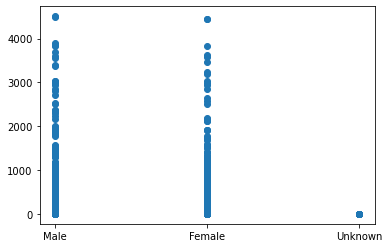

In [29]:
# Perform scatter plot of covid19_deaths per gender to look for potential outliers 
plt.scatter(df.gender, df.covid19_deaths)

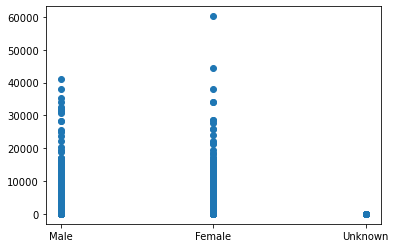

In [30]:
# Perform scatter plot of total_deaths per gender to look for potential outliers 
plt.scatter(df.gender, df.total_deaths)

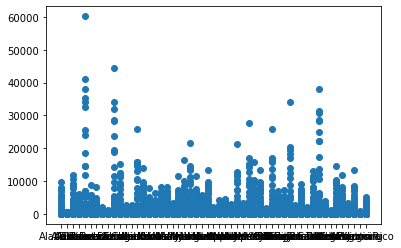

In [31]:
plt.scatter(df.state, df.total_deaths)

## Fill in nulls with zero

In [32]:
# Now we will fill in the reminder NaN's with 0.0. 
# In this case we are assuming that missing values in the counts means no cases were reported or confirmed.
df.fillna(0)

,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths
66,01/01/2020,01/16/2021,Alabama,Male,Under 1 year,0.0,205.0
67,01/01/2020,01/16/2021,Alabama,Male,0-17 years,0.0,401.0
68,01/01/2020,01/16/2021,Alabama,Male,1-4 years,0.0,47.0
69,01/01/2020,01/16/2021,Alabama,Male,5-14 years,0.0,71.0
70,01/01/2020,01/16/2021,Alabama,Male,15-24 years,0.0,527.0
...,...,...,...,...,...,...,...
2656,01/01/2020,01/16/2021,Puerto Rico,Unknown,50-64 years,0.0,0.0
2657,01/01/2020,01/16/2021,Puerto Rico,Unknown,55-64 years,0.0,0.0
2658,01/01/2020,01/16/2021,Puerto Rico,Unknown,65-74 years,0.0,0.0
2659,01/01/2020,01/16/2021,Puerto Rico,Unknown,75-84 years,0.0,0.0


In [33]:
df1 = df

## DSC540
# Week 7&8
## Project Milestone 3 
## Astrid Fuentes 2/4/2021

Cleaning/Formatting Website Data

Perform at least 5 data transformation and/or cleansing steps to your website data. For example:

- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

Milestone 3 is due Sunday, by Midnight of Week 8. Refer to the rubric for more grading detail.

As a reminder, my web data is 
https://www.worldometers.info/coronavirus/country/us/

In [34]:
# Import the necesary libraries
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [35]:
%cd '/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Week7_8'
%pwd

/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Week7_8


'/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Week7_8'

In [36]:
tables = pd.read_html('worldometer_info.htm')

In [37]:
len(tables)

9

In [38]:
df = failures = tables[0]

In [39]:
failures.head()

,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Source,Projections
0,NaN,USA Total,27167039,"+16,509",462335.0,399.0,16911063.0,9793641.0,82075.0,1397.0,317328390.0,958688.0,NaN,NaN,NaN
1,1.0,California,3354424,NaN,42467.0,NaN,1633579.0,1678378.0,84896.0,1075.0,43067233.0,1089972.0,39512223.0,[view by county] [1],[projections]
2,2.0,Texas,2455028,NaN,38285.0,NaN,2066338.0,350405.0,84668.0,1320.0,20497505.0,706911.0,28995881.0,[view by county] [1] [2] [3],[projections]
3,3.0,Florida,1744619,NaN,27023.0,NaN,903704.0,813892.0,81229.0,1258.0,19406606.0,903568.0,21477737.0,[view by county] [1] [2] [3],[projections]
4,4.0,New York,1479263,NaN,44279.0,NaN,562813.0,872171.0,76041.0,2276.0,32613477.0,1676479.0,19453561.0,[view by county] [1] [2] [3],[projections]


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 63 non-null     float64
 1   USAState          65 non-null     object 
 2   TotalCases        65 non-null     int64  
 3   NewCases          15 non-null     object 
 4   TotalDeaths       62 non-null     float64
 5   NewDeaths         13 non-null     float64
 6   TotalRecovered    60 non-null     float64
 7   ActiveCases       60 non-null     float64
 8   Tot Cases/1M pop  54 non-null     float64
 9   Deaths/1M pop     54 non-null     float64
 10  TotalTests        62 non-null     float64
 11  Tests/ 1M pop     54 non-null     float64
 12  Population        52 non-null     float64
 13  Source            61 non-null     object 
 14  Projections       51 non-null     object 
dtypes: float64(10), int64(1), object(4)
memory usage: 7.7+ KB


In [41]:
# Obtain column names
df.columns.tolist()

['#',
 'USAState',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop',
 'Population',
 'Source',
 'Projections']

In [42]:
# Drop columns I do not want at this time
df = df.drop(columns=['#', 'TotalTests','Tests/ 1M pop','Source','Projections'])

In [43]:
# Verify the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          65 non-null     object 
 1   TotalCases        65 non-null     int64  
 2   NewCases          15 non-null     object 
 3   TotalDeaths       62 non-null     float64
 4   NewDeaths         13 non-null     float64
 5   TotalRecovered    60 non-null     float64
 6   ActiveCases       60 non-null     float64
 7   Tot Cases/1M pop  54 non-null     float64
 8   Deaths/1M pop     54 non-null     float64
 9   Population        52 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


In [44]:
# # Obtain column names again
df.columns.tolist()

['USAState',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'Population']

In [45]:
# Rename columns
df = df.rename(columns={'USAState': "state",
 'TotalCases': "total_cases",
 'NewCases': "new_cases",
 'TotalDeaths': "total_deaths",
 'NewDeaths': "new_deaths",
 'TotalRecovered': "total_recovered",
 'ActiveCases': "active_cases",
 'Tot\xa0Cases/1M pop': "cases_per_1mp",
 'Deaths/1M pop':"deaths_per_1mp",
 'Population': "population"})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            65 non-null     object 
 1   total_cases      65 non-null     int64  
 2   new_cases        15 non-null     object 
 3   total_deaths     62 non-null     float64
 4   new_deaths       13 non-null     float64
 5   total_recovered  60 non-null     float64
 6   active_cases     60 non-null     float64
 7   cases_per_1mp    54 non-null     float64
 8   deaths_per_1mp   54 non-null     float64
 9   population       52 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


In [47]:
# Find duplicates
print("state is duplictaed - {}".format(any(df.state.duplicated())))

state is duplictaed - False


In [48]:
# Find nulls
print("The column state contains NaN - %r " % df.state.isnull().values.any())
print("The column total cases contains NaN - %s " % df.total_cases.isnull().values.any())
print("The column population contains NaN - %s " % df.population.isnull().values.any())

The column state contains NaN - False 
The column total cases contains NaN - False 
The column population contains NaN - True 


In [49]:
# drop rows with Nan population
df = df.dropna(subset=['population'], inplace = False)


In [50]:
df.head()

,state,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,cases_per_1mp,deaths_per_1mp,population
1,California,3354424,NaN,42467.0,NaN,1633579.0,1678378.0,84896.0,1075.0,39512223.0
2,Texas,2455028,NaN,38285.0,NaN,2066338.0,350405.0,84668.0,1320.0,28995881.0
3,Florida,1744619,NaN,27023.0,NaN,903704.0,813892.0,81229.0,1258.0,21477737.0
4,New York,1479263,NaN,44279.0,NaN,562813.0,872171.0,76041.0,2276.0,19453561.0
5,Illinois,1137559,"+3,328",21497.0,77.0,943665.0,172397.0,89771.0,1696.0,12671821.0


In [51]:
# Fill nulls with blanks
df = df.fillna("", inplace=False)

In [52]:
df.head()

,state,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,cases_per_1mp,deaths_per_1mp,population
1,California,3354424,,42467.0,,1.63358e+06,1.67838e+06,84896.0,1075.0,39512223.0
2,Texas,2455028,,38285.0,,2.06634e+06,350405,84668.0,1320.0,28995881.0
3,Florida,1744619,,27023.0,,903704,813892,81229.0,1258.0,21477737.0
4,New York,1479263,,44279.0,,562813,872171,76041.0,2276.0,19453561.0
5,Illinois,1137559,"+3,328",21497.0,77,943665,172397,89771.0,1696.0,12671821.0


In [53]:
# Remove plus signs from new_cases
df['new_cases'] = df['new_cases'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))

In [54]:
df.head()

,state,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,cases_per_1mp,deaths_per_1mp,population
1,California,3354424,,42467.0,,1.63358e+06,1.67838e+06,84896.0,1075.0,39512223.0
2,Texas,2455028,,38285.0,,2.06634e+06,350405,84668.0,1320.0,28995881.0
3,Florida,1744619,,27023.0,,903704,813892,81229.0,1258.0,21477737.0
4,New York,1479263,,44279.0,,562813,872171,76041.0,2276.0,19453561.0
5,Illinois,1137559,"3,328",21497.0,77,943665,172397,89771.0,1696.0,12671821.0


In [55]:
# Get rid of outliers. I commented this out because I do not really want to get rid of higher numbers at this time.
# There are various ways to do this. This is just one way. We encourage you to explore other ways.
# But before that we need to store the previous size of the data set and we will compare it with the new size
#size_prev = df.shape
#df = df[np.isfinite(df['total_cases'])] #This is an inplace operation. After this operation the original DataFrame is lost.
#size_after = df.shape

In [56]:
df

,state,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,cases_per_1mp,deaths_per_1mp,population
1,California,3354424,,42467.0,,1.63358e+06,1.67838e+06,84896.0,1075.0,39512223.0
2,Texas,2455028,,38285.0,,2.06634e+06,350405,84668.0,1320.0,28995881.0
3,Florida,1744619,,27023.0,,903704,813892,81229.0,1258.0,21477737.0
4,New York,1479263,,44279.0,,562813,872171,76041.0,2276.0,19453561.0
5,Illinois,1137559,"3,328",21497.0,77,943665,172397,89771.0,1696.0,12671821.0
6,Georgia,922364,,14587.0,,402137,505640,86873.0,1374.0,10617423.0
7,Ohio,906727,,11431.0,,799819,95477,77570.0,978.0,11689100.0
8,Pennsylvania,862455,"3,102",22197.0,131,708501,131757,67369.0,1734.0,12801989.0
9,North Carolina,776307,,9578.0,,683697,83032,74018.0,913.0,10488084.0
10,Arizona,767379,,13576.0,,105379,648424,105428.0,1865.0,7278717.0


We have dropped unnecesary columns, renamed columns, removed unwanted rows, verified that all states are unique, verified no state or total cases were blanks, removed records with null population, replaced all other nulls with blanks, and removed "+" sign from the new_cases column.
At this point, my data looks pretty clean to me. I do not have any fuzzy matching to do or any other data cleaning at this point.
I decided to not remove any outliers at this time. In the future, if necesary, I could do that.

In [57]:
df2=df

# Project Milestone 4 : Connecting to an API/Pulling in the Data and Cleaning/Formatting
## DSC540
### Astrid Fuentes


Perform at least 5 data transformation and/or cleansing steps to your API data. For example:

- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching


You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

My API is from https://covidtracking.com/data/api

In [58]:
# Define the libraries
import pandas as pd
import os
import urllib.request, urllib.parse, urllib.error
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
path="/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project"
os.chdir(path)

In [60]:
os.getcwd()

'/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project'

In [61]:
# covid tracking API https://api.covidtracking.com
serviceurl = 'https://api.covidtracking.com'

In [62]:
# Read the visit_data csv file using pandas' read_csv function
df = pd.read_csv("https://api.covidtracking.com/v1/us/daily.csv")

In [63]:
df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210302,56,28453529.0,107545653.0,11196.0,46388.0,870901.0,9465.0,45084.0,3169.0,...,2021-03-02T24:00:00Z,NaN,0,0,1885,1871,357994,54248,1345162,50980a4ade52050897576e230a6763df608f0ffc
1,20210301,56,28399281.0,107187659.0,11748.0,46738.0,869030.0,9595.0,44956.0,3171.0,...,2021-03-01T24:00:00Z,NaN,0,0,1241,1024,238126,48092,1171361,3935d64eab01ed0864bcddbf680f9d7ba906cdb5
2,20210228,56,28351189.0,106949533.0,11708.0,47352.0,868006.0,9802.0,44907.0,3245.0,...,2021-02-28T24:00:00Z,NaN,0,0,1051,879,293739,54349,1398018,9a9fe2a3330dfc62e2e6c423937f12e12f9dc838
3,20210227,56,28296840.0,106655794.0,11731.0,48871.0,867127.0,10114.0,44875.0,3335.0,...,2021-02-27T24:00:00Z,NaN,0,0,1847,1428,346542,71245,1647637,3b1c2e20f2348007ecde192cd02e5b3f07fec501
4,20210226,56,28225595.0,106309252.0,11945.0,51112.0,865699.0,10466.0,44791.0,3466.0,...,2021-02-26T24:00:00Z,NaN,0,0,2141,1933,453573,74857,1802643,2f64f3ac20ffb0bbd582af9c20bdfb87fb524812


In [64]:
# Dataframe column names
list(df.columns.values) 

['date',
 'states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked',
 'death',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'recovered',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

## 1. Rename column names

In [65]:
# Rename columns
df= df.rename(columns = {'date': 'date_collected','states': 'number_of_states'}, inplace = False)

In [66]:
# Verify column names have been updated
list(df.columns.values) 

['date_collected',
 'number_of_states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked',
 'death',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'recovered',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

## 2. Drop columns we are not interested in

In [67]:
df.drop(['recovered','hash','hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked','total','posNeg'], axis=1)

,date_collected,number_of_states,positive,negative,pending,death,hospitalized,totalTestResults,lastModified,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20210302,56,28453529.0,107545653.0,11196.0,506373.0,870901.0,356187939,2021-03-02T24:00:00Z,1885,1871,357994,54248,1345162
1,20210301,56,28399281.0,107187659.0,11748.0,504488.0,869030.0,354842777,2021-03-01T24:00:00Z,1241,1024,238126,48092,1171361
2,20210228,56,28351189.0,106949533.0,11708.0,503247.0,868006.0,353671416,2021-02-28T24:00:00Z,1051,879,293739,54349,1398018
3,20210227,56,28296840.0,106655794.0,11731.0,502196.0,867127.0,352273398,2021-02-27T24:00:00Z,1847,1428,346542,71245,1647637
4,20210226,56,28225595.0,106309252.0,11945.0,500349.0,865699.0,350625761,2021-02-26T24:00:00Z,2141,1933,453573,74857,1802643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,20200117,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-17T24:00:00Z,0,0,0,0,0
411,20200116,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-16T24:00:00Z,0,0,0,0,0
412,20200115,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-15T24:00:00Z,0,0,0,0,0
413,20200114,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-14T24:00:00Z,0,0,0,0,0


## 3. Fill NaN with zero

In [68]:
# Now we will fill in the reminder NaN's with 0.0. 
# In this case we are assuming that missing values in the counts means no cases were reported or confirmed.
df.fillna(0)

,date_collected,number_of_states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210302,56,28453529.0,107545653.0,11196.0,46388.0,870901.0,9465.0,45084.0,3169.0,...,2021-03-02T24:00:00Z,0.0,0,0,1885,1871,357994,54248,1345162,50980a4ade52050897576e230a6763df608f0ffc
1,20210301,56,28399281.0,107187659.0,11748.0,46738.0,869030.0,9595.0,44956.0,3171.0,...,2021-03-01T24:00:00Z,0.0,0,0,1241,1024,238126,48092,1171361,3935d64eab01ed0864bcddbf680f9d7ba906cdb5
2,20210228,56,28351189.0,106949533.0,11708.0,47352.0,868006.0,9802.0,44907.0,3245.0,...,2021-02-28T24:00:00Z,0.0,0,0,1051,879,293739,54349,1398018,9a9fe2a3330dfc62e2e6c423937f12e12f9dc838
3,20210227,56,28296840.0,106655794.0,11731.0,48871.0,867127.0,10114.0,44875.0,3335.0,...,2021-02-27T24:00:00Z,0.0,0,0,1847,1428,346542,71245,1647637,3b1c2e20f2348007ecde192cd02e5b3f07fec501
4,20210226,56,28225595.0,106309252.0,11945.0,51112.0,865699.0,10466.0,44791.0,3466.0,...,2021-02-26T24:00:00Z,0.0,0,0,2141,1933,453573,74857,1802643,2f64f3ac20ffb0bbd582af9c20bdfb87fb524812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,20200117,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-17T24:00:00Z,0.0,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
411,20200116,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-16T24:00:00Z,0.0,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
412,20200115,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-15T24:00:00Z,0.0,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
413,20200114,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-14T24:00:00Z,0.0,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


## 4. Find duplicates

In [69]:
# To identify duplicates across the whole data set we can use the duplicated() function as follows
check_dups_in_df = df.duplicated().values.any()
print(check_dups_in_df)

False


## 5. Checking for outliers

In [70]:
df.describe()

,date_collected,number_of_states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,totalTestResults,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.150000e+02,415.000000,4.140000e+02,3.670000e+02,364.000000,351.000000,364.000000,342.000000,343.000000,343.000000,...,364.000000,4.150000e+02,0.0,415.0,415.0,415.000000,415.000000,415.000000,415.000000,4.150000e+02
mean,2.020208e+07,49.397590,7.868764e+06,4.111567e+07,9577.458791,58203.749288,388854.464286,11734.856725,20705.364431,3989.475219,...,388854.464286,1.041790e+08,NaN,0.0,0.0,1220.175904,2098.556627,259146.151807,68562.720482,8.582842e+05
std,3.375590e+03,16.983183,8.730623e+06,3.433276e+07,9998.649078,32072.436216,249447.862708,5918.307937,13346.621702,2204.222251,...,249447.862708,1.099719e+08,NaN,0.0,0.0,1073.077997,1868.146107,176078.999414,69081.011285,6.573554e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,4.000000,0.000000e+00,NaN,0.0,0.0,0.000000,-2856.000000,-512587.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,9.748908e+05,8.290348e+06,3354.250000,34949.500000,212256.250000,6667.750000,9806.000000,2164.000000,...,212256.250000,5.632979e+06,NaN,0.0,0.0,420.500000,971.500000,98225.000000,22375.500000,2.327630e+05
50%,2.020081e+07,56.000000,4.925436e+06,3.521170e+07,9842.500000,49770.000000,366635.500000,9992.000000,18648.000000,3245.000000,...,366635.500000,6.638727e+07,NaN,0.0,0.0,1015.000000,1820.000000,288696.000000,44340.000000,8.163230e+05
75%,2.020112e+07,56.000000,1.167930e+07,7.053298e+07,11950.250000,72408.500000,566096.500000,15176.500000,32033.000000,5928.500000,...,566096.500000,1.779871e+08,NaN,0.0,0.0,1585.000000,2966.500000,391524.500000,90968.000000,1.389512e+06
max,2.021030e+07,56.000000,2.845353e+07,1.075457e+08,65709.000000,132474.000000,870901.000000,23912.000000,45084.000000,8004.000000,...,870901.000000,3.561879e+08,NaN,0.0,0.0,5427.000000,17287.000000,661569.000000,295121.000000,2.309186e+06


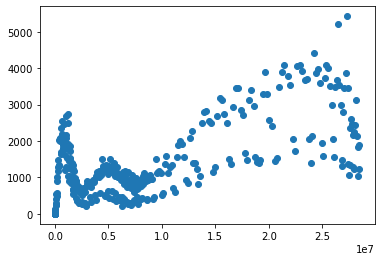

In [71]:
# Perform scatter plot of positive cases vs. death increase 
plt.scatter(df.positive, df.deathIncrease)

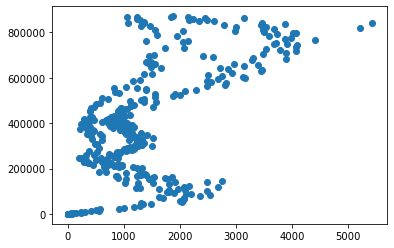

In [72]:
# Perform scatter plot of deathIncrease vs. hospitalizedCumulative
plt.scatter(df.deathIncrease, df.hospitalizedCumulative)

In [73]:
df3=df

# Project Milestone 5
## Merging the Data and Storing in a Database/Visualizing Data
## All 3 datasets have been stored as df1, df2, and df3


Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>

In [74]:
# Import the sql libraries
import sqlalchemy as sqla
import sqlite3

In [75]:
# Get column names for the 3 tables
col1=df1.columns.tolist()
print(col1)

col2=df2.columns.tolist()
print(col2)

col3=df3.columns.tolist()
print(col3)

['start_date', 'end_date', 'state', 'gender', 'age_group', 'covid19_deaths', 'total_deaths']
['state', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_recovered', 'active_cases', 'cases_per_1mp', 'deaths_per_1mp', 'population']
['date_collected', 'number_of_states', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'dateChecked', 'death', 'hospitalized', 'totalTestResults', 'lastModified', 'recovered', 'total', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease', 'hash']


In [76]:
# Get column data types for the 3 tables
df1.info()
df2.info()
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 66 to 2660
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   start_date      2375 non-null   object 
 1   end_date        2375 non-null   object 
 2   state           2375 non-null   object 
 3   gender          2375 non-null   object 
 4   age_group       2375 non-null   object 
 5   covid19_deaths  2024 non-null   float64
 6   total_deaths    2238 non-null   float64
dtypes: float64(2), object(5)
memory usage: 148.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            52 non-null     object 
 1   total_cases      52 non-null     int64  
 2   new_cases        52 non-null     object 
 3   total_deaths     52 non-null     float64
 4   new_deaths       52 non-null     object 
 5   tota

In [84]:
# Queries to create the tables providing column names and data types 
query1 = "CREATE TABLE table_1 (start_date VARCHAR(20), end_date VARCHAR(200), state VARCHAR(20), gender VARCHAR(20), age_group VARCHAR(20), covid19_deaths DECIMAL (10,4), total_deaths DECIMAL(10,4));"
query2 = "CREATE TABLE table_2 (state VARCHAR(20), total_cases INTEGER, new_cases VARCHAR(20), total_deaths INTEGER, new_deaths VARCHAR(20),  total_recovered VARCHAR(20), active_cases VARCHAR(20), cases_per_1mp DECIMAL(10,4), deaths_per_1mp DECIMAL(10,4), population DECIMAL(10,4));"
query3 = "CREATE TABLE table_3 (date_collected INTEGER, number_of_states INTEGER, positive DECIMAL(10,4), negative DECIMAL(10,4), pending DECIMAL(10,4), hospitalizedCurrently DECIMAL(10,4), hospitalizedCumulative DECIMAL(10,4), inIcuCurrently DECIMAL(10,4), inIcuCumulative DECIMAL(10,4), onVentilatorCurrently DECIMAL(10,4), onVentilatorCumulative DECIMAL(10,4), dateChecked VARCHAR(20), death DECIMAL(10,4), hospitalized DECIMAL(10,4), totalTestResults DECIMAL(10,4), lastModified VARCHAR(20), recovered DECIMAL(10,4), total DECIMAL(10,4), posNeg DECIMAL(10,4), deathIncrease DECIMAL(10,4), hospitalizedIncrease DECIMAL(10,4), negativeIncrease DECIMAL(10,4), positiveIncrease DECIMAL(10,4), totalTestResultsIncrease DECIMAL(10,4), hash VARCHAR(20));"

In [79]:
# Connect to the sqlite data base
con = sqlite3.connect('mydata_astrid.sqlite')

In [81]:
# Execute the query to create the table1
con.execute(query1)

In [82]:
# Execute the query to create the table2
con.execute(query2)

In [85]:
# Execute the query to create the table3
con.execute(query3)

In [86]:
# Commit the statement to the data base
con.commit

<function Connection.commit>

In [94]:
cursor = con.cursor()

In [105]:
# Use to_sql function to insert the df1 to the table1
df1.to_sql('table1', con=con, if_exists='append')

In [106]:
# Use to_sql function to insert the df2 to the table2
df2.to_sql('table2', con=con, if_exists='append')

In [107]:
# Use to_sql function to insert the df3 to the table3
df3.to_sql('table3', con=con, if_exists='append')

In [109]:
con.commit()

Now we have loaded our 3 data sources to the database tables table1, table2, and table3. Now we can combine them.

In [114]:
# Create a query to join the tables 1 and 2 matching on state
query4 = "CREATE TABLE combined_a AS SELECT * FROM table1 join table2 on table1.state = table2.state"

In [115]:
con.execute(query4)

In [116]:
con.commit

<function Connection.commit>

In [121]:
# Create a query that joins the pervious combined_a table with table3 matching on end_date = date_collected
# This did not work as expected, need to investigate
query5 = "CREATE TABLE combined AS SELECT * FROM combined_a join table3 on combined_a.end_date = table3.date_collected"

In [122]:
con.execute(query5)

In [123]:
con.commit

<function Connection.commit>

In [129]:
# Define cursor to select from the joined table
cursor = con.execute ('SELECT * FROM combined_a')

In [130]:
# Retrieve all the rows in cursor
rows = cursor.fetchall()

In [131]:
# show the rows in the screen
rows

[(66,
  '01/01/2020',
  '01/16/2021',
  'Alabama',
  'Male',
  'Under 1 year',
  None,
  205.0,
  20,
  'Alabama',
  465056,
  '',
  8203.0,
  '',
  '242143.0',
  '214710.0',
  94848.0,
  1673.0,
  4903185.0),
 (67,
  '01/01/2020',
  '01/16/2021',
  'Alabama',
  'Male',
  '0-17 years',
  None,
  401.0,
  20,
  'Alabama',
  465056,
  '',
  8203.0,
  '',
  '242143.0',
  '214710.0',
  94848.0,
  1673.0,
  4903185.0),
 (68,
  '01/01/2020',
  '01/16/2021',
  'Alabama',
  'Male',
  '1-4 years',
  0.0,
  47.0,
  20,
  'Alabama',
  465056,
  '',
  8203.0,
  '',
  '242143.0',
  '214710.0',
  94848.0,
  1673.0,
  4903185.0),
 (69,
  '01/01/2020',
  '01/16/2021',
  'Alabama',
  'Male',
  '5-14 years',
  0.0,
  71.0,
  20,
  'Alabama',
  465056,
  '',
  8203.0,
  '',
  '242143.0',
  '214710.0',
  94848.0,
  1673.0,
  4903185.0),
 (70,
  '01/01/2020',
  '01/16/2021',
  'Alabama',
  'Male',
  '15-24 years',
  None,
  527.0,
  20,
  'Alabama',
  465056,
  '',
  8203.0,
  '',
  '242143.0',
  '214710.0

In [135]:
# Define a pandas data fram using the data stored in rows and the first column of cursor containing the column names
combined_df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
combined_df.head()

,index,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths,index:1,state:1,total_cases,new_cases,total_deaths:1,new_deaths,total_recovered,active_cases,cases_per_1mp,deaths_per_1mp,population
0,66,01/01/2020,01/16/2021,Alabama,Male,Under 1 year,NaN,205.0,20,Alabama,465056,,8203.0,,242143.0,214710.0,94848.0,1673.0,4903185.0
1,67,01/01/2020,01/16/2021,Alabama,Male,0-17 years,NaN,401.0,20,Alabama,465056,,8203.0,,242143.0,214710.0,94848.0,1673.0,4903185.0
2,68,01/01/2020,01/16/2021,Alabama,Male,1-4 years,0.0,47.0,20,Alabama,465056,,8203.0,,242143.0,214710.0,94848.0,1673.0,4903185.0
3,69,01/01/2020,01/16/2021,Alabama,Male,5-14 years,0.0,71.0,20,Alabama,465056,,8203.0,,242143.0,214710.0,94848.0,1673.0,4903185.0
4,70,01/01/2020,01/16/2021,Alabama,Male,15-24 years,NaN,527.0,20,Alabama,465056,,8203.0,,242143.0,214710.0,94848.0,1673.0,4903185.0


As a result, we have a nice looking pandas table that we can use to create our visualizations.

In [136]:
# Export to csv to bring into Tableau for visualizations
combined_df.to_csv('combined.csv')

In [137]:
%pwd

'/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project'

Final considerations:

While working on this project I have learned to work with different data sources like flat files, web pages, APIs, etc. I have learned how to clean the data and perform basics checks for duplication, missing information, etc. I have learned to rename columns, replace nulls, and other cleaning and organizing activities.
Additionally, I learned, not only to connect to a database, but also how to work with databases including creating tables, loading data to them, retrieving data, joining, etc. 
Overall, I think this project is very helpful and I plan on keep working on it and improving it as time allows. I know there are things that I could do better but given time constrains I was unable to at this time.
